### Μείωση διαστατικότητας (dimensionality reduction)

* Αν σε ένα σύνολο δεδομένων έχουμε από 1 έως 3 στήλες/χαρακτηριστικά, μπορούμε πολύ εύκολα να οπτικοποιήσουμε τα περιεχόμενα του με την χρήση δισδιάστατων ή τρισδιάστατων γραφημάτων.

* Στις περισσότερες των περιπτώσεων τα πραγματικά datasets αποτελούνται από περισσότερες από 3 στήλες/χαρακτηριστικά.

* Μέσω μεθόδων μείωσης διαστατικότητας, κάνουμε μια προβολή από τον n-διάστατο χώρο είτε στον δισδιάστατο είτε στον τρισδιάστατο χώρο έτσι ώστε να μπορέσουμε να οπτικοποιήσουμε τα δεδομένα που έχουμε στην διάθεσή μας και να κάνουμε ανάλυση σχετικά με τάσεις και πρότυπα που αυτά δύναται να ακολουθούν.

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import umap

* Δημιουργούμε ένα dictionary μέσω του οποίου θα αλλάξουμε τις τιμές της μεταβλητής εξόδου έτσι ώστε να μπορούμε να χρωματίσουμε τα δείγματα του dataset.

In [2]:
tag_vals = {
    0: "control",
    1: "case",
}

In [3]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")
tag = pd.DataFrame(df["tag"], columns=["tag"])
df = df.drop(['tag'], axis=1)
tag = tag.replace({"tag": tag_vals})

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [5]:
tag

,tag
0,control
1,case
2,case
3,control
4,control
...,...
292,case
293,case
294,case
295,case


### PCA (Principal Component Analysis)

* Στα Ελληνικά γνωστή και ως Ανάλυση Κυρίων Συνιστωσών.

* Μέσω γραμμικών μετασχηματισμών, προβάλει τα δεδομένα σε ένα νέο σύστημα συντεταγμένων όπου η μέγιστη διακύμανση που φέρον αυτά, περιγράφεται από πολύ λιγότερες διαστάσεις.

* Για πολλές μελέτες οι πρώτες δύο ή οι πρώτες τρεις κύριες συνιστώσες, χρησιμοποιούνται για οπτικοποίηση και ανάλυση.

In [6]:
# Calculate PCA with 2 components. PCA is a method that reduces the dimensionality of the data
# by projecting it onto two principal components that capture the most variance in the data.
pca_2d = PCA(n_components=2)
principalComponents_2d = pca_2d.fit_transform(df)
# Convert the principal components into a pandas dataframe for ease of use
principalDf_2d = pd.DataFrame(data=principalComponents_2d, columns=['PC 1', 'PC 2'])
# Concatenate the labels to the dataframe for color-coding the plot
principalDf_2d = pd.concat([principalDf_2d, tag[['tag']]], axis=1)

In [7]:
principalDf_2d

,PC 1,PC 2,tag
0,-13.325147,2.924464,control
1,40.575214,45.572540,case
2,-18.401154,21.404449,case
3,1.829988,-39.912295,control
4,-43.894744,-23.941741,control
...,...,...,...
292,-5.770413,27.499073,case
293,15.175630,12.708056,case
294,-53.089083,13.175412,case
295,-116.044520,35.794238,case


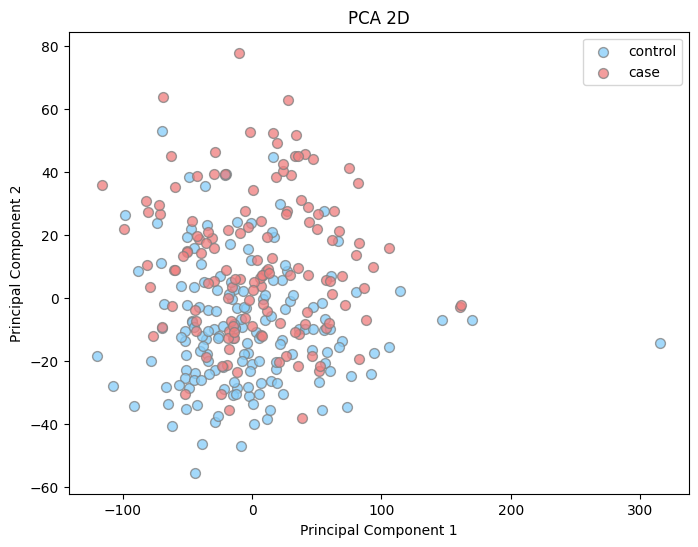

In [8]:
plt.figure(figsize=(8, 6))
for label, color in zip(tag['tag'].unique(), ["lightskyblue", "lightcoral"]):
    indicesToKeep = principalDf_2d['tag'] == label
    plt.scatter(
        principalDf_2d.loc[indicesToKeep, 'PC 1'], 
        principalDf_2d.loc[indicesToKeep, 'PC 2'], 
        c=color, 
        s=50, 
        edgecolors='gray',  # This adds the gray border around each point
        alpha=0.77  # Adjust the transparency of the points
    )
plt.title('PCA 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(tag['tag'].unique())
plt.show()

### UMAP

* Πρόκεται για έναν μη γραμμικό αλγόριθμο μείωσης διαστατικότητας

* Δημιουργεί έναν γράφο υψηλής διαστατικότητας έτσι ώστε να αναπαραστήσει τα δεδομένα.

* Έπειτα, βελτιστοποιεί έναν γράφο χαμηλής διαστατικότητας έτσι ώστε οι δύο γράφοι (χαμηλής και υψηλής διαστατικότητας) να είναι όσο πιο όμοιοι γίνεται από πλευράς δομής.

In [9]:
# UMAP is a manifold learning technique for dimension reduction.
# Here, we specify 2 components to project the data into a 2D space.
umap_2d = umap.UMAP(n_components=2)
umap_data_2d = umap_2d.fit_transform(df)

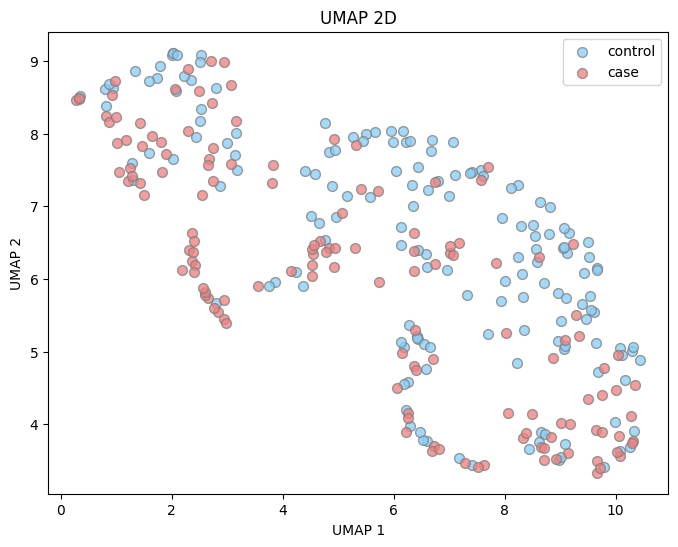

In [10]:
plt.figure(figsize=(8, 6))
for label, color in zip(tag['tag'].unique(), ["lightskyblue", "lightcoral"]):
    indicesToKeep = tag['tag'] == label
    plt.scatter(
        umap_data_2d[indicesToKeep, 0],
        umap_data_2d[indicesToKeep, 1],
        c=color,
        s=50, 
        edgecolors='gray',  # Adding gray edge colors here as well
        alpha=0.77
    )
plt.title('UMAP 2D')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(tag['tag'].unique())
plt.show()

### T-SNE

* Μη γραμμικός αλγόριθμος μείωσης διαστατικότητας

* Η μεγαλύτερη διαφορά ανάμεσα στο UMAP και το T-SNE, είναι η ισορροπία μεταξύ τοπικής και συνολικής δομής του γράφου.

*  Το UMAP είναι στις περισσότερες των περιπτώσεων καλύτερο όσον αφορά στην διατήρηση της συνολικής δομής του γράφου (αυτό σημαίνει ότι "σχέσεις" που δύναται να υπάρχουν μεταξύ μιας ομάδας σημείων δεδομένων έχουν ενδεχομένως να έχουν περισσότερο νόημα στο UMAP απ' ό,τι στο T-SNE).

In [11]:
# t-SNE is a technique for dimensionality reduction that is particularly well suited for
# the visualization of high-dimensional datasets.
tsne_2d = TSNE(n_components=2, random_state=0)
tsne_data_2d = tsne_2d.fit_transform(df.copy())

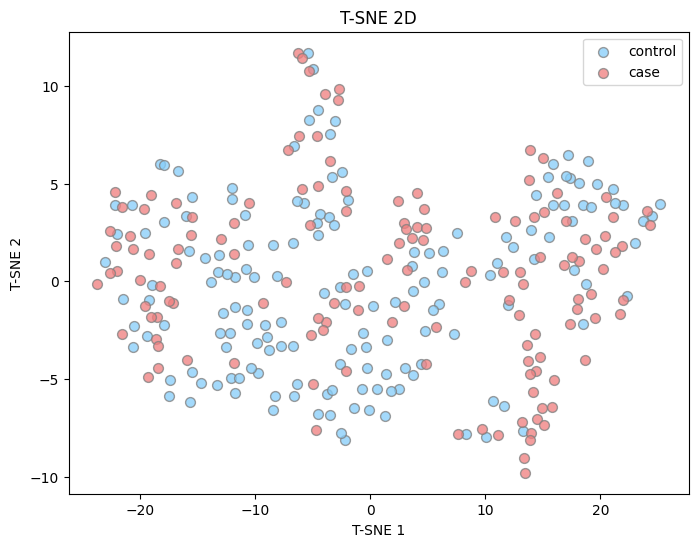

In [12]:
plt.figure(figsize=(8, 6))
for label, color in zip(tag['tag'].unique(), ["lightskyblue", "lightcoral"]):
    indicesToKeep = tag['tag'] == label
    plt.scatter(
        tsne_data_2d[indicesToKeep, 0],
        tsne_data_2d[indicesToKeep, 1],
        c=color,
        s=50, 
        edgecolors='gray',  # And here
        alpha=0.77
    )
plt.title('T-SNE 2D')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.legend(tag['tag'].unique())
plt.show()

### 3D Plots

* Μπορούμε να δημιουργήσουμε και τις τρισδιάστατες εκδοχές των ίδιων plots

### 3D PCA

In [13]:
# Assuming 'df' is your DataFrame with the data and 'labels' is the Series or list with the labels
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(df)
principalDf_3d = pd.DataFrame(data=principalComponents_3d, columns=['PC 1', 'PC 2', 'PC 3'])

# Assuming 'labels' is your labels list or Series that is aligned with 'df'
principalDf_3d['tag'] = tag

In [14]:
principalDf_3d

,PC 1,PC 2,PC 3,tag
0,-13.325147,2.924464,15.002728,control
1,40.575214,45.572540,21.341348,case
2,-18.401154,21.404449,-11.739030,case
3,1.829988,-39.912295,1.239755,control
4,-43.894744,-23.941741,2.155310,control
...,...,...,...,...
292,-5.770413,27.499073,5.061737,case
293,15.175630,12.708056,-25.833337,case
294,-53.089083,13.175412,15.575370,case
295,-116.044520,35.794238,0.178220,case


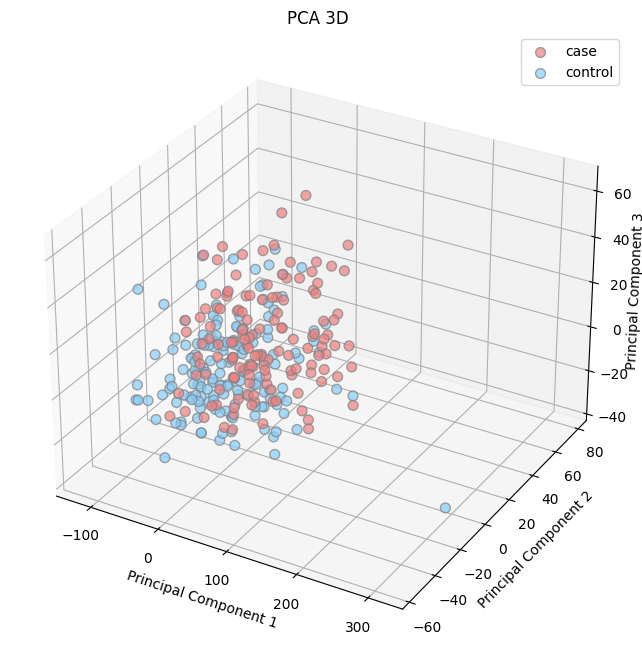

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
unique_labels = np.unique(tag)
colors = ["lightcoral", "lightskyblue"]

for label, color in zip(unique_labels, colors):
    indicesToKeep = principalDf_3d['tag'] == label
    ax.scatter(
        principalDf_3d.loc[indicesToKeep, 'PC 1'],
        principalDf_3d.loc[indicesToKeep, 'PC 2'],
        principalDf_3d.loc[indicesToKeep, 'PC 3'],
        c=[color],
        s=50,
        edgecolors='gray',  # Gray border around each point
        alpha=0.7,
        label=label
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3', labelpad=-1.5)
ax.set_title('PCA 3D')
ax.legend()
plt.show()

### 3D UMAP

In [16]:
# Initialize UMAP. The random_state parameter ensures reproducibility
umap_3d = umap.UMAP(n_components=3, random_state=42)

# Compute UMAP representation
umap_result_3d = umap_3d.fit_transform(df)

# Create a DataFrame for the UMAP result
umap_df_3d = pd.DataFrame(umap_result_3d, columns=['UMAP 1', 'UMAP 2', 'UMAP 3'])

# Add the labels as a column to this DataFrame
umap_df_3d['tag'] = tag["tag"].values

c:\Users\kostas\prj\joist_seminar_2023\jvenv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


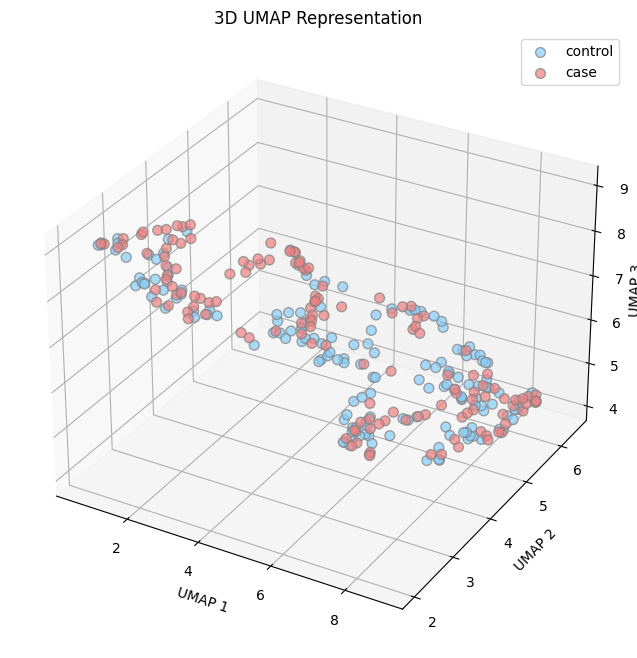

In [17]:
# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtain the unique labels for plotting
unique_labels = tag['tag'].unique()

# Create a color map
colors = ["lightskyblue", "lightcoral"]

# Plot each cluster
for label, color in zip(unique_labels, colors):
    indices = umap_df_3d['tag'] == label
    ax.scatter(
        umap_df_3d.loc[indices, 'UMAP 1'],
        umap_df_3d.loc[indices, 'UMAP 2'],
        umap_df_3d.loc[indices, 'UMAP 3'],
        c=[color],
        edgecolors='gray',  # This adds the gray border around the points
        s=50,
        alpha=0.7,
        label=label
    )

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3', labelpad=-1.3)
ax.legend()
ax.set_title('3D UMAP Representation')

plt.show()

### 3D T-SNE

In [18]:
# Assuming 'labels' is a Pandas series or a list that corresponds to the labels of the rows in 'df'.
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_data_3d = tsne_3d.fit_transform(df)

# Convert the t-SNE output to a DataFrame for easier manipulation
tsne_df_3d = pd.DataFrame(tsne_data_3d, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])

# Add the labels to this DataFrame
tsne_df_3d['tag'] = tag

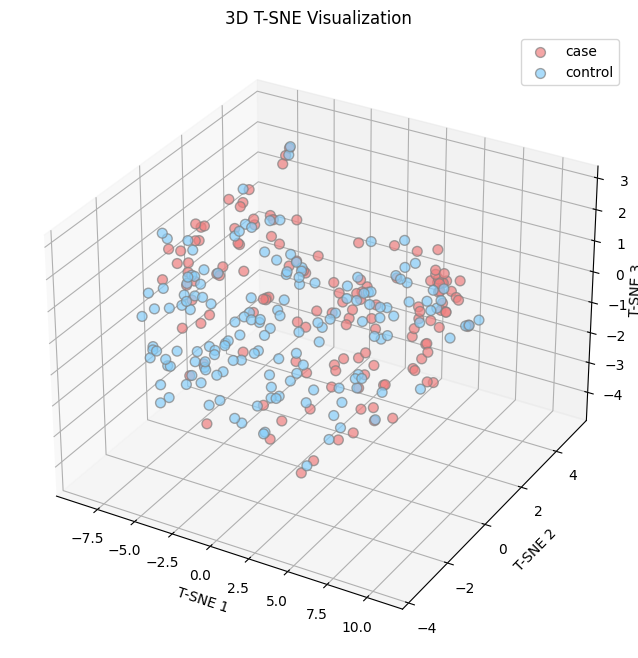

In [19]:
color_map = {
    'case': 'lightcoral',
    'control': 'lightskyblue'
    # Adjust the keys and colors to your specific labels
}

# Create a new figure for plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Group the data by labels and plot each group with its color
for label, group in tsne_df_3d.groupby('tag'):
    ax.scatter(
        group['TSNE-1'], group['TSNE-2'], group['TSNE-3'],
        color=color_map[label],  # Use the color defined in color_map
        label=label,
        edgecolor='gray',  # Black edges around the dots for better visibility
        s=50,           # Size of the dots
        alpha=0.7       # Transparency of the dots
    )

# Set labels for axes
ax.set_xlabel('T-SNE 1')
ax.set_ylabel('T-SNE 2')
ax.set_zlabel('T-SNE 3', labelpad=-1.5)

# Title for the plot
ax.set_title('3D T-SNE Visualization')

# Legend to show labels
ax.legend()

# Show plot
plt.show()